In [3]:
import pandas as pd

In [ ]:
# Cargar el archivo para inspeccionar su contenido
file_path = '../aproach_ai.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas y la información básica del DataFrame
data.head(), data.info()

El archivo contiene 18 entradas y 5 columnas, que son las siguientes:

1. **Enfoque**: El tipo de enfoque de inteligencia artificial.
2. **Descripción**: Una corta descripción del enfoque.
3. **Aplicaciones**: Aplicaciones típicas de cada enfoque.
4. **Ventajas**: Ventajas asociadas a cada enfoque.
5. **Desventajas**: Desventajas de cada enfoque.

Dado que todas las columnas son de tipo objeto y parecen contener textos descriptivos, podríamos crear visualizaciones que resalten las aplicaciones y las ventajas/desventajas de los diferentes enfoques. Aquí te propongo tres posibles visualizaciones:

1. **Nube de palabras** de las aplicaciones, ventajas o desventajas.
2. **Gráfico de barras** que compare un aspecto específico (por ejemplo, ventajas) de cada enfoque.
3. **Gráfico circular** que muestre la distribución de los diferentes enfoques.

1.- Voy a proceder a crear estas visualizaciones. Comenzaré con la nube de palabras. 

In [7]:
import matplotlib.pyplot as plt 
from wordcloud  import WordCloud 

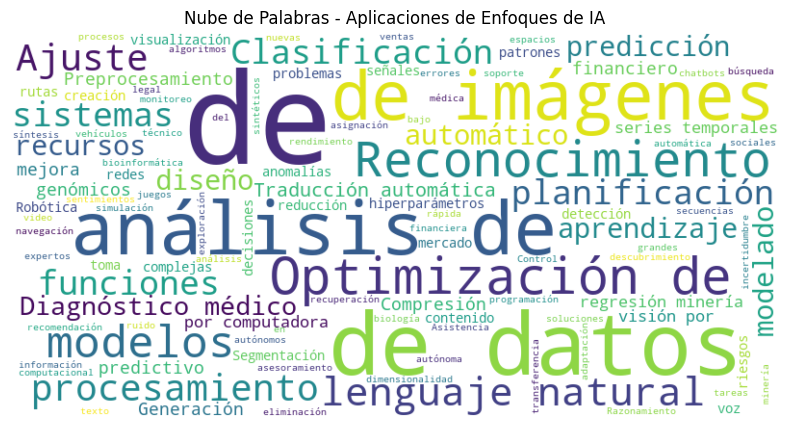

In [13]:
#  Crear  una  nube  de  palabras  a  partir  de  las  aplicaciones 
text_apps  = ''.join(data['Aplicaciones'])
wordcloud_apps  =  WordCloud(width = 800, height=400 ,  background_color ='white').generate(text_apps)

 #  Config urar  la  visual ización  de  la  nube  de  palabras
plt.figure(figsize =( 10 ,   5 ))
plt.imshow(wordcloud_apps ,  interpolation ='bilinear')
plt.axis('off')    #  No  mostrar  e jes 
plt.title('Nube de Palabras - Aplicaciones de Enfoques de IA')
plt.show()

Aquí tienes la primera visualización: una **nube de palabras** que muestra las aplicaciones de los diferentes enfoques de inteligencia artificial. Las palabras más grandes indican las aplicaciones más comunes.


2.- Ahora, procederé a crear un gráfico de barras que compare las ventajas de cada enfoque. Vamos a hacerlo.

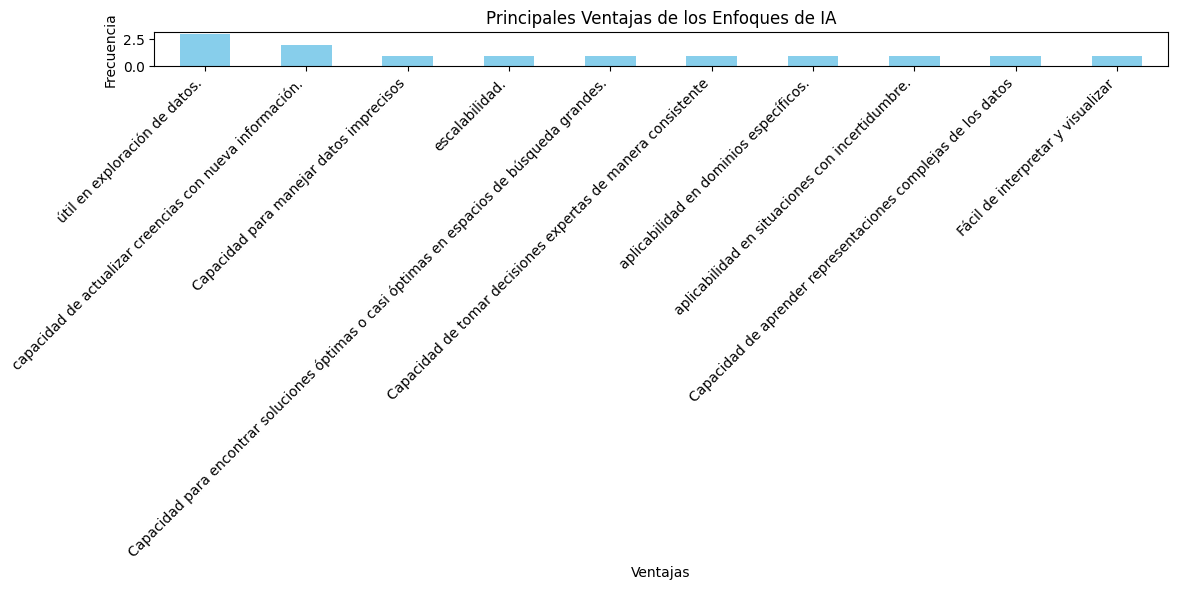

In [11]:
# Contar las palabras en las ventajas
ventajas = data['Ventajas'].str.split(', ').explode().value_counts()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
ventajas.head(10).plot(kind='bar', color='skyblue')
plt.title('Principales Ventajas de los Enfoques de IA')
plt.xlabel('Ventajas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

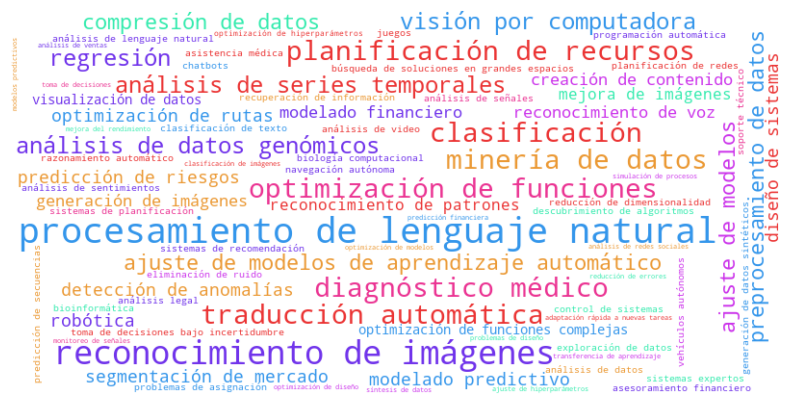

In [26]:
import random

# Función para asignar colores estilo CMYK
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = [
        (235, 52, 52),    # Cian
        (235, 153, 52),    # Magenta
        (52, 235, 174),    # Amarillo
        (52, 150, 235),         # Negro
        (113, 52, 235),         # Negro
        (204, 52, 235),         # Negro
        (235, 52, 147)         # Negro
       
    ]
    return random.choice(colors)

todas_las_frases = []

# Recorrer cada fila de la columna
for frases in data['Aplicaciones']:
    # Separar las frases usando ', ' como delimitador y añadirlas a la lista
    frases = frases.lower().strip()
    lista_frases = [frase.strip().rstrip('.') for frase in frases.split(', ')]

    todas_las_frases.extend(lista_frases)

frecuencia_frases = {}
for frase in todas_las_frases:
    if frase in frecuencia_frases:
        frecuencia_frases[frase] += 1
    else:
        frecuencia_frases[frase] = 1

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_frases)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()


3.- Ahora, procederé a crear un gráfico circular que muestre la distribución de los diferentes enfoques de IA. Vamos a ello.

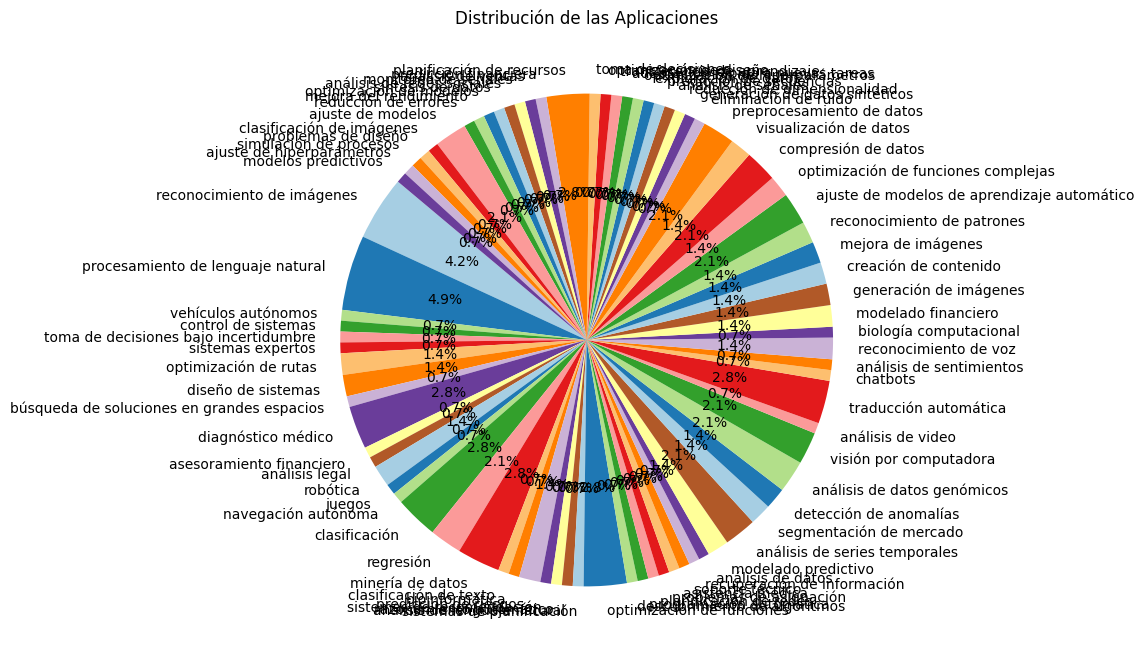

                              Enfoque  Frecuencia
1   procesamiento de lenguaje natural           7
0          reconocimiento de imágenes           6
9                  diagnóstico médico           4
17                   minería de datos           4
15                      clasificación           4
..                                ...         ...
77          clasificación de imágenes           1
78                problemas de diseño           1
79             simulación de procesos           1
80          ajuste de hiperparámetros           1
81                modelos predictivos           1

[82 rows x 2 columns]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que la columna de interés se llama 'categoría'
# Contar la frecuencia de cada categoría
todas_las_frases = []

# Recorrer cada fila de la columna
for frases in data['Aplicaciones']:
    # Separar las frases usando ', ' como delimitador y añadirlas a la lista
    frases = frases.lower().strip()
    lista_frases = [frase.strip().rstrip('.') for frase in frases.split(', ')]

    todas_las_frases.extend(lista_frases)

frecuencia_frases = {}
for frase in todas_las_frases:
    if frase in frecuencia_frases:
        frecuencia_frases[frase] += 1
    else:
        frecuencia_frases[frase] = 1

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_frases.values(), labels=frecuencia_frases.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Añadir título
plt.title('Distribución de las Aplicaciones')

# Mostrar el gráfico
plt.show()


# Convertir el diccionario en un DataFrame para facilitar la ordenación y visualización
df_frecuencia = pd.DataFrame(list(frecuencia_frases.items()), columns=['Enfoque', 'Frecuencia'])

# Ordenar el DataFrame de mayor a menor frecuencia
df_frecuencia = df_frecuencia.sort_values(by='Frecuencia', ascending=False)

# Mostrar la tabla ordenada
print(df_frecuencia[:10])

In [32]:
# Mostrar la tabla ordenada
print(df_frecuencia[:10])

                              Enfoque  Frecuencia
1   procesamiento de lenguaje natural           7
0          reconocimiento de imágenes           6
9                  diagnóstico médico           4
17                   minería de datos           4
15                      clasificación           4
25          optimización de funciones           4
41              traducción automática           4
67          planificación de recursos           4
35      análisis de series temporales           3
16                          regresión           3
